#Data Importing

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!pip install Sastrawi

In [8]:
import sys
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import Sastrawi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
train_path = '/content/drive/My Drive/Permutasi UGM 2020 (Pi=e=3)/Data_A_UKARA/data_train_A.csv'
test_path = '/content/drive/My Drive/Permutasi UGM 2020 (Pi=e=3)/Data_A_UKARA/data_test_A.csv'

In [12]:
df_train = pd.read_csv(train_path, header=0)
df_test = pd.read_csv(test_path, header=0)

In [11]:
df_train.head()

,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1


In [13]:
df_test.head()

,RES_ID,RESPONSE,LABEL
0,TSA1,"beradaptasi dengan lingkunagn baru, lahan dan ...",1
1,TSA2,Pengungsi akan mencari mata pencaharian yang b...,1
2,TSA3,komunitas dan negaranya.,1
3,TSA4,mereka perlu menyesuaikan diri dan beradaptasi...,1
4,TSA5,TANTANGNNYA ADALAH KEBUTUHAN EKONOMI,1


#Data Preprocessing (Keras Embeeding)

##Data Train

In [35]:
vocab_size = 1500
embedding_dim = 16
max_length = 40
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .6

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [18]:
sentences = []
labels = []
stopwords = StopWordRemoverFactory().get_stop_words()

In [19]:
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [20]:
sentences = df_train['RESPONSE']
labels = df_train['LABEL']

print(len(sentences))
print(len(labels))

268
268


In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [25]:
stemmer = StemmerFactory().create_stemmer()

In [28]:
for i in range(0, len(sentences)):
  sentences[i] = stemmer.stem(sentences[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

160
160
160
108
108


In [33]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

print(len(train_sentences))
print(train_sentences.shape)
print(len(validation_sequences))
print(validation_sentences.shape)

160
(160,)
108
(108,)


In [37]:
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(train_padded.shape)
print(validation_padded.shape)

(160, 40)
(108, 40)


##Data Test

In [44]:
test_sentences = []
test_labels = []

In [47]:
test_sentences = df_test['RESPONSE']
test_labels = df_test['LABEL']

print(len(test_sentences))
print(len(test_labels))

855
855


In [50]:
print(test_sentences)

0      adaptasi dengan lingkunagn baru lahan dan hart...
1      ungsi akan cari mata cahari yang baru karena m...
2                                   komunitas dan negara
3      mereka perlu sesuai diri dan adaptasi dengan l...
4                       tantangnnya adalah butuh ekonomi
                             ...                        
850    Mereka akan melakukan adaptasi kembali dengan ...
851                         mendapat tempat tinggal baru
852    KESULITAN AIR BERSIH . MAKANAN DAN SUSAH UNTUK...
853    perlu waktu untuk beradaptasi di tempat yang baru
854                         IKLIM DAN JUGA WARGA SEKITAR
Name: RESPONSE, Length: 855, dtype: object


In [51]:
for i in range(0, len(test_sentences)):
  test_sentences[i] = stemmer.stem(str(test_sentences[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

print(len(test_sentences))
print(test_padded.shape)

855
(855, 40)


#Modelling (Bag-to-Words)

##MLP

##LSTM

#Modelling (Keras Embeeding)

##MLP

In [40]:
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 16)            24000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 24,433
Trainable params: 24,433
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(train_padded, train_labels, epochs=150, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/150
5/5 - 0s - loss: 0.6895 - accuracy: 0.7125 - precision_1: 0.7125 - recall_1: 1.0000 - val_loss: 0.6864 - val_accuracy: 0.7130 - val_precision_1: 0.7130 - val_recall_1: 1.0000
Epoch 2/150
5/5 - 0s - loss: 0.6840 - accuracy: 0.7125 - precision_1: 0.7125 - recall_1: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.7130 - val_precision_1: 0.7130 - val_recall_1: 1.0000
Epoch 3/150
5/5 - 0s - loss: 0.6783 - accuracy: 0.7125 - precision_1: 0.7125 - recall_1: 1.0000 - val_loss: 0.6759 - val_accuracy: 0.7130 - val_precision_1: 0.7130 - val_recall_1: 1.0000
Epoch 4/150
5/5 - 0s - loss: 0.6724 - accuracy: 0.7125 - precision_1: 0.7125 - recall_1: 1.0000 - val_loss: 0.6702 - val_accuracy: 0.7130 - val_precision_1: 0.7130 - val_recall_1: 1.0000
Epoch 5/150
5/5 - 0s - loss: 0.6669 - accuracy: 0.7125 - precision_1: 0.7125 - recall_1: 1.0000 - val_loss: 0.6640 - val_accuracy: 0.7130 - val_precision_1: 0.7130 - val_recall_1: 1.0000
Epoch 6/150
5/5 - 0s - loss: 0.6606 - accuracy: 0.7125 - precisio

In [55]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

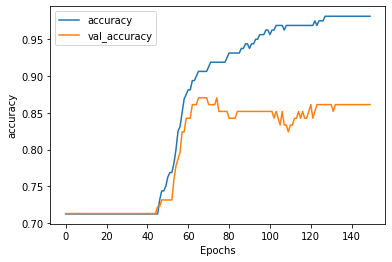

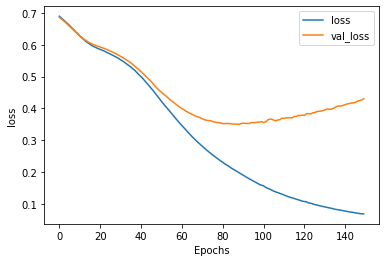

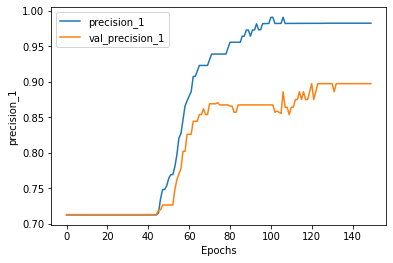

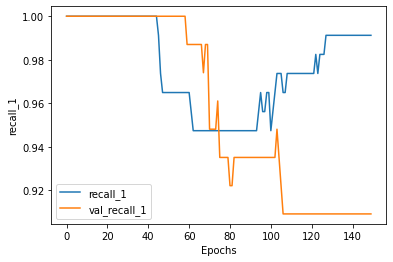

In [56]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "precision_1")
plot_graphs(history, "recall_1")

In [63]:
pred = model.predict(test_padded)
pred = [[1 if i == max(sc) else 0 for i in sc] for sc in pred]

In [65]:
print("Accuracy pada test data:", accuracy_score(test_labels, pred))

Accuracy pada test data: 0.7134502923976608


In [66]:
print("Precision pada test data:", precision_score(test_labels, pred))

Precision pada test data: 0.7134502923976608


In [67]:
print("Recall pada test data:", recall_score(test_labels, pred))

Recall pada test data: 1.0


In [68]:
print("F1-score pada test data:", f1_score(test_labels, pred))

F1-score pada test data: 0.832764505119454


In [70]:
tn_dev, fp_dev, fn_dev, tp_dev = confusion_matrix(test_labels, pred).ravel()
TPR_dev = tp_dev/(tp_dev+fn_dev)
FPR_dev = fp_dev/(fp_dev+tn_dev)
TNR_dev = tn_dev/(fp_dev+tn_dev)
FNR_dev = fn_dev/(tp_dev+fn_dev)
print("TPR pada test data:", TPR_dev)
print("FPR pada test data:", FPR_dev)
print("TNR pada test data:", TNR_dev)
print("FNR pada test data:", FNR_dev)

TPR pada test data: 1.0
FPR pada test data: 1.0
TNR pada test data: 0.0
FNR pada test data: 0.0


##LSTM

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 16)            24000     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                13400     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 38,649
Trainable params: 38,649
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(train_padded, train_labels, epochs=150, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/150
5/5 - 1s - loss: 0.6854 - accuracy: 0.7125 - precision_2: 0.7125 - recall_2: 1.0000 - val_loss: 0.6792 - val_accuracy: 0.7130 - val_precision_2: 0.7130 - val_recall_2: 1.0000
Epoch 2/150
5/5 - 0s - loss: 0.6714 - accuracy: 0.7125 - precision_2: 0.7125 - recall_2: 1.0000 - val_loss: 0.6614 - val_accuracy: 0.7130 - val_precision_2: 0.7130 - val_recall_2: 1.0000
Epoch 3/150
5/5 - 0s - loss: 0.6500 - accuracy: 0.7125 - precision_2: 0.7125 - recall_2: 1.0000 - val_loss: 0.6321 - val_accuracy: 0.7130 - val_precision_2: 0.7130 - val_recall_2: 1.0000
Epoch 4/150
5/5 - 0s - loss: 0.6237 - accuracy: 0.7125 - precision_2: 0.7125 - recall_2: 1.0000 - val_loss: 0.6112 - val_accuracy: 0.7130 - val_precision_2: 0.7130 - val_recall_2: 1.0000
Epoch 5/150
5/5 - 0s - loss: 0.6114 - accuracy: 0.7125 - precision_2: 0.7125 - recall_2: 1.0000 - val_loss: 0.6114 - val_accuracy: 0.7130 - val_precision_2: 0.7130 - val_recall_2: 1.0000
Epoch 6/150
5/5 - 0s - loss: 0.6020 - accuracy: 0.7125 - precisio

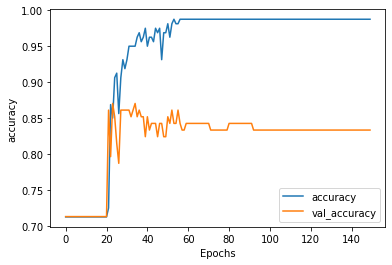

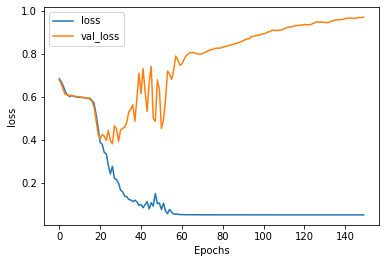

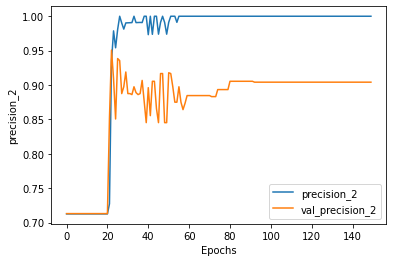

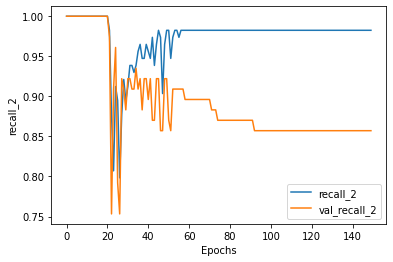

In [73]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "precision_2")
plot_graphs(history, "recall_2")

In [74]:
pred = model.predict(test_padded)
pred = [[1 if i == max(sc) else 0 for i in sc] for sc in pred]

In [75]:
print("Accuracy pada test data:", accuracy_score(test_labels, pred))

Accuracy pada test data: 0.7134502923976608


In [76]:
print("Precision pada test data:", precision_score(test_labels, pred))

Precision pada test data: 0.7134502923976608


In [77]:
print("Recall pada test data:", recall_score(test_labels, pred))

Recall pada test data: 1.0


In [78]:
print("F1-score pada test data:", f1_score(test_labels, pred))

F1-score pada test data: 0.832764505119454


In [79]:
tn_dev, fp_dev, fn_dev, tp_dev = confusion_matrix(test_labels, pred).ravel()
TPR_dev = tp_dev/(tp_dev+fn_dev)
FPR_dev = fp_dev/(fp_dev+tn_dev)
TNR_dev = tn_dev/(fp_dev+tn_dev)
FNR_dev = fn_dev/(tp_dev+fn_dev)
print("TPR pada test data:", TPR_dev)
print("FPR pada test data:", FPR_dev)
print("TNR pada test data:", TNR_dev)
print("FNR pada test data:", FNR_dev)

TPR pada test data: 1.0
FPR pada test data: 1.0
TNR pada test data: 0.0
FNR pada test data: 0.0


#Modelling (fastText)

##MLP

##LSTM